In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [2]:
df = pd.read_csv(r'C:\Users\Windows10\Desktop\Statistics & Data Mining\rakamin\bootcamp - data science batch 29\Train.csv')
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [3]:
#Menghapus kolom ID
df = df.drop('ID', axis='columns')

In [4]:
df.tail()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,D,Ship,2,5,155,5,low,F,6,1639,0


## Missing Value dan Duplicate

In [5]:
# Cek Missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


Tidak ada data yang kosong

In [6]:
# Cek Duplikat
df.duplicated().sum()

0

Tidak ada data yang duplikat

## Outliers

Dari hasil EDA diatas, dapat diketahui bahwa feature yang memiliki outliers adalah **Prio_purchase** dan **Discount_offered**

In [7]:
#Split data
X = df.copy().drop(['Reached.on.Time_Y.N'], axis=1)
Y = df['Reached.on.Time_Y.N'].copy()

In [8]:
X['Warehouse_block'] = X['Warehouse_block'].replace('F', 'E')
X

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,3,low,F,44,1233
1,E,Flight,4,5,216,2,low,M,59,3088
2,A,Flight,2,2,183,4,low,M,48,3374
3,B,Flight,3,3,176,4,medium,M,10,1177
4,C,Flight,2,2,184,3,medium,F,46,2484
...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538
10995,B,Ship,4,1,232,5,medium,F,6,1247
10996,C,Ship,5,4,242,5,low,F,4,1155
10997,E,Ship,5,2,223,6,medium,M,2,1210


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 19, test_size = 0.2, stratify = Y)

In [10]:
print('jumlah x train: ', len(X_train))
print('Jumlah y train: ', len(y_train))
print('jumlah x test: ', len(X_test))
print('Jumlah y test: ', len(y_test))

jumlah x train:  8799
Jumlah y train:  8799
jumlah x test:  2200
Jumlah y test:  2200


<AxesSubplot:ylabel='Prior_purchases'>

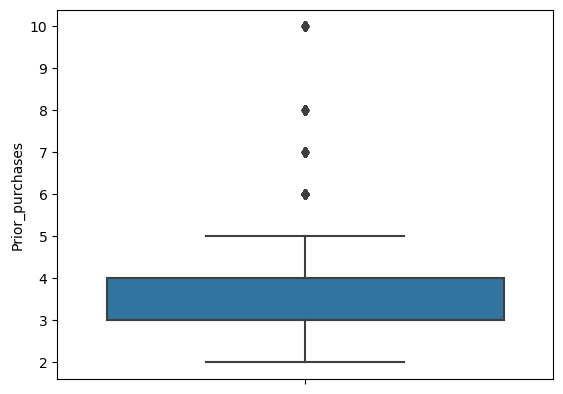

In [11]:
sns.boxplot(y=X_train['Prior_purchases'])

<AxesSubplot:ylabel='Prior_purchases'>

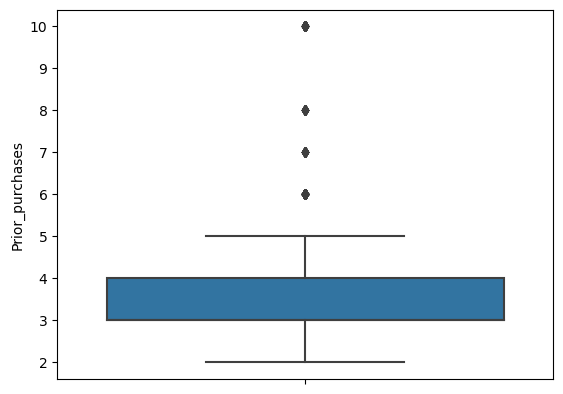

In [12]:
sns.boxplot(y=X_test['Prior_purchases'])

In [13]:
X_test['Prior_purchases'].value_counts()

3     765
2     514
4     451
5     253
6     119
10     55
7      23
8      20
Name: Prior_purchases, dtype: int64

In [14]:
X_train['Prior_purchases'].value_counts()

3     3190
2     2085
4     1704
5     1034
6      442
10     123
7      113
8      108
Name: Prior_purchases, dtype: int64

<AxesSubplot:ylabel='Discount_offered'>

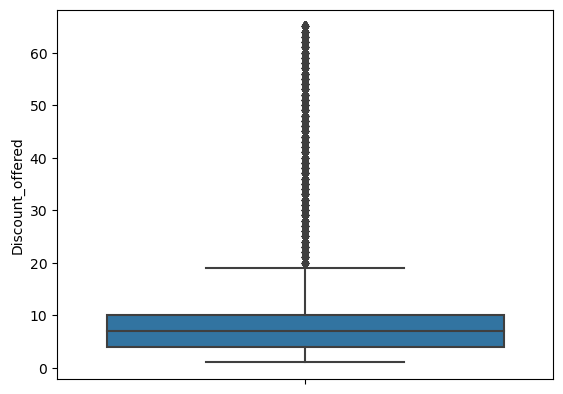

In [15]:
sns.boxplot(y=X_train['Discount_offered'])

<AxesSubplot:ylabel='Discount_offered'>

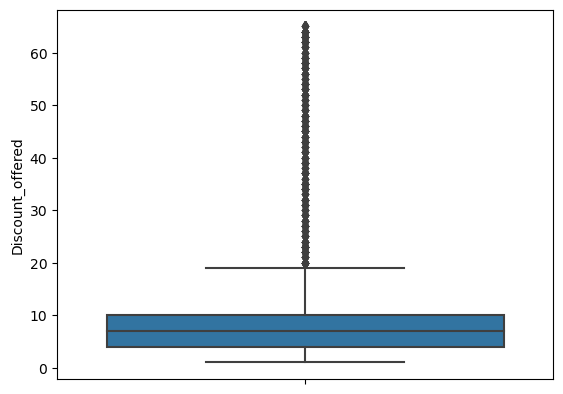

In [16]:
sns.boxplot(y=X_test['Discount_offered'])

In [17]:
X_test['Discount_offered'].value_counts()

2     175
4     173
10    172
1     172
6     165
     ... 
65      6
38      5
36      5
33      5
15      5
Name: Discount_offered, Length: 65, dtype: int64

In [18]:
X_train['Discount_offered'].value_counts()

10    688
6     684
2     683
9     681
3     679
     ... 
42     28
30     28
64     27
26     27
25     26
Name: Discount_offered, Length: 65, dtype: int64

In [19]:
# Penghapusan outlier berdasar IQR

Q1 = X_train['Prior_purchases'].quantile(0.25)
Q3 = X_train['Prior_purchases'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((X_train['Prior_purchases'] >= low_limit) & (X_train['Prior_purchases'] <= high_limit))
X_train = X_train[filtered_entries]
y_train = y_train[filtered_entries]
print('jumlah x train: ', len(X_train))
print('Jumlah y train: ', len(y_train))


jumlah x train:  8013
Jumlah y train:  8013


<AxesSubplot:ylabel='Prior_purchases'>

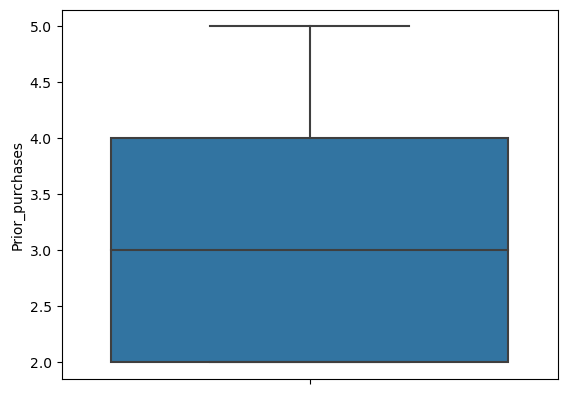

In [20]:
sns.boxplot(y=X_train['Prior_purchases'])

<AxesSubplot:xlabel='Prior_purchases', ylabel='Count'>

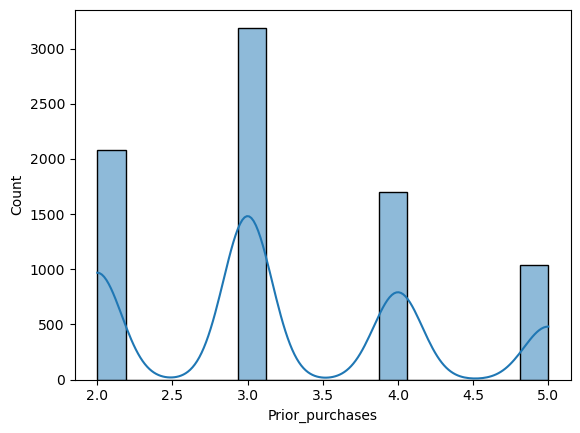

In [21]:
sns.histplot(kde=True, data=X_train['Prior_purchases'])

In [22]:
X_train.sample(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
8843,E,Ship,3,4,195,2,medium,F,10,4031
10829,E,Flight,4,4,199,4,high,M,1,4163
3515,E,Ship,5,4,178,2,low,F,4,5307
3171,B,Ship,3,2,136,2,high,F,6,4002
10964,A,Flight,5,3,224,5,low,M,5,1842
2167,E,Road,3,2,151,2,low,M,26,1793
4590,D,Ship,5,3,210,3,high,F,4,4819
5137,E,Ship,3,5,180,2,medium,M,1,5940
9877,E,Flight,3,4,243,3,medium,M,6,4950
2579,E,Road,4,2,128,5,low,F,28,1247


<AxesSubplot:ylabel='Discount_offered'>

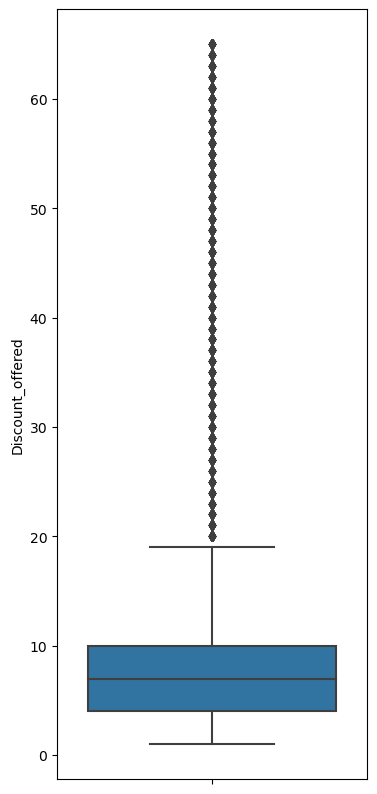

In [23]:
# Penghapusan outliers Discount_offered
plt.figure(figsize=(4,10))
sns.boxplot(y=X_train['Discount_offered'])

Karena outlier dapat dibilang sangat banyak dan memiliki korelasi kuat dengan feature target, maka tidak akan dilakukan penghapusan karena akan menghilangkan banyak sekali informasi

Sebagai gantinya, akan dilakukan **Winsorize** yaitu mengganti extream value dengan nilai quantile 95,
hal ini dilakukan agar machine tetap bisa mempelajari adanya korelasi tanpa merusak model

> Refrensi : [Handle many outliers](https://blog.devgenius.io/too-many-outliers-winsorization-6f120e7e8257)

In [24]:
print('Mean before: ', X_train['Discount_offered'].mean())
X_train['Discount_offered'] = winsorize(X_train['Discount_offered'], (0, 0.21))
print('Mean after: ', X_train['Discount_offered'].mean())

Mean before:  13.399975040559092
Mean after:  8.193435667041058


<AxesSubplot:ylabel='Discount_offered'>

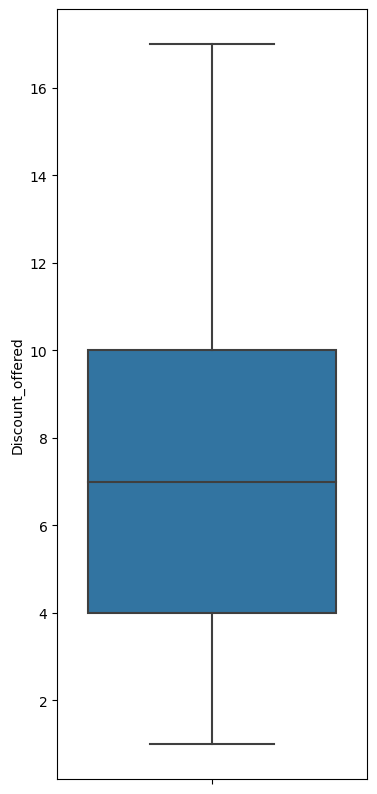

In [25]:
plt.figure(figsize=(4,10))
sns.boxplot(y=X_train['Discount_offered'])

<AxesSubplot:xlabel='Discount_offered', ylabel='Count'>

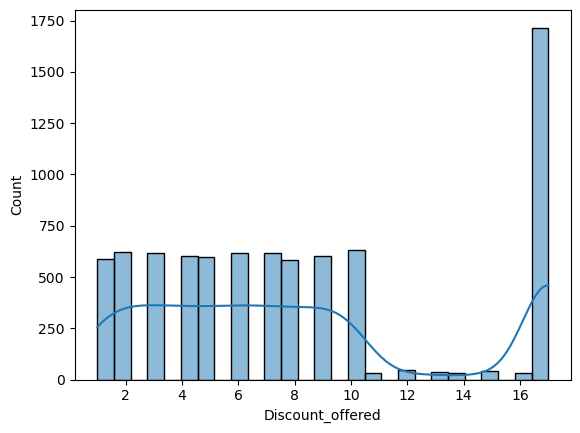

In [26]:
sns.histplot(kde=True, data=X_train['Discount_offered'])

## Transformation

In [27]:
X_train.sample(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
421,E,Flight,4,2,251,2,medium,M,17,2405
175,E,Ship,4,4,150,2,medium,M,3,1285
7649,E,Road,5,1,265,4,low,F,2,5416
5945,E,Ship,3,5,164,3,high,M,10,4639
6728,A,Flight,3,3,234,3,low,M,3,4405
9112,C,Ship,3,1,159,3,low,M,10,4358
5947,E,Ship,4,1,269,2,medium,F,8,4930
216,D,Ship,4,3,185,3,medium,M,3,3131
3251,E,Ship,6,5,189,2,high,M,4,5898
8687,E,Ship,5,1,176,3,low,M,3,5919


In [28]:
mm = MinMaxScaler()
for col in ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']:
    scaler = mm.fit(X_train[[col]])
    X_train[col] = scaler.transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

In [29]:
nums = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
X_train[nums].head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
5933,0.2,0.00,0.406542,0.000000,0.5625,0.525493
5177,0.2,0.25,0.607477,0.666667,0.4375,0.617093
8406,0.2,0.00,0.663551,0.000000,0.2500,0.489993
8731,0.6,0.25,0.663551,0.000000,0.2500,0.686925
9754,0.4,1.00,0.219626,0.333333,0.0625,0.626004


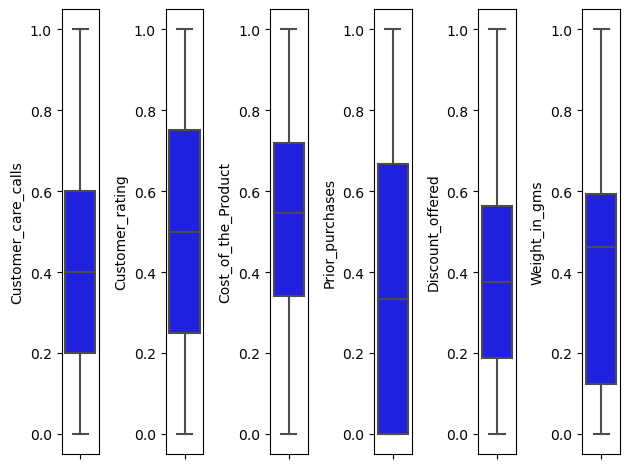

In [30]:
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=X_train[nums[i]], color='blue', orient='v')
    plt.tight_layout()

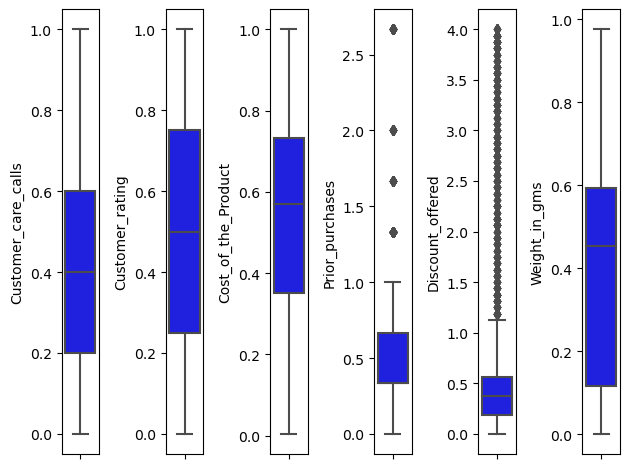

In [31]:
for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=X_test[nums[i]], color='blue', orient='v')
    plt.tight_layout()

In [32]:
X_train[nums].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,8013.000000,8013.000000,8013.000000,8013.000000,8013.000000,8013.000000
mean,0.409809,0.495133,0.531382,0.403511,0.449590,0.387084
std,0.229020,0.355215,0.225584,0.324005,0.337457,0.237992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.250000,0.341121,0.000000,0.187500,0.124324
50%,0.400000,0.500000,0.546729,0.333333,0.375000,0.461505
75%,0.600000,0.750000,0.719626,0.666667,0.562500,0.591673
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
X_test[nums].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.411727,0.503750,0.542961,0.541970,0.788977,0.377658
std,0.232879,0.347574,0.222882,0.538973,1.034041,0.241902
min,0.000000,0.000000,0.004673,0.000000,0.000000,0.000292
25%,0.200000,0.250000,0.350467,0.333333,0.187500,0.116983
50%,0.400000,0.500000,0.570093,0.333333,0.375000,0.453543
75%,0.600000,0.750000,0.733645,0.666667,0.562500,0.593572
max,1.000000,1.000000,1.000000,2.666667,4.000000,0.976333


In [34]:
#Label Encoding
mapping_prod_imp = {
    'low': 0,
    'medium': 1,
    'high': 2
}
X_train['Product_importance'] = X_train['Product_importance'].map(mapping_prod_imp)
X_test['Product_importance'] = X_test['Product_importance'].map(mapping_prod_imp)

In [35]:
# One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [36]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (20, 7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

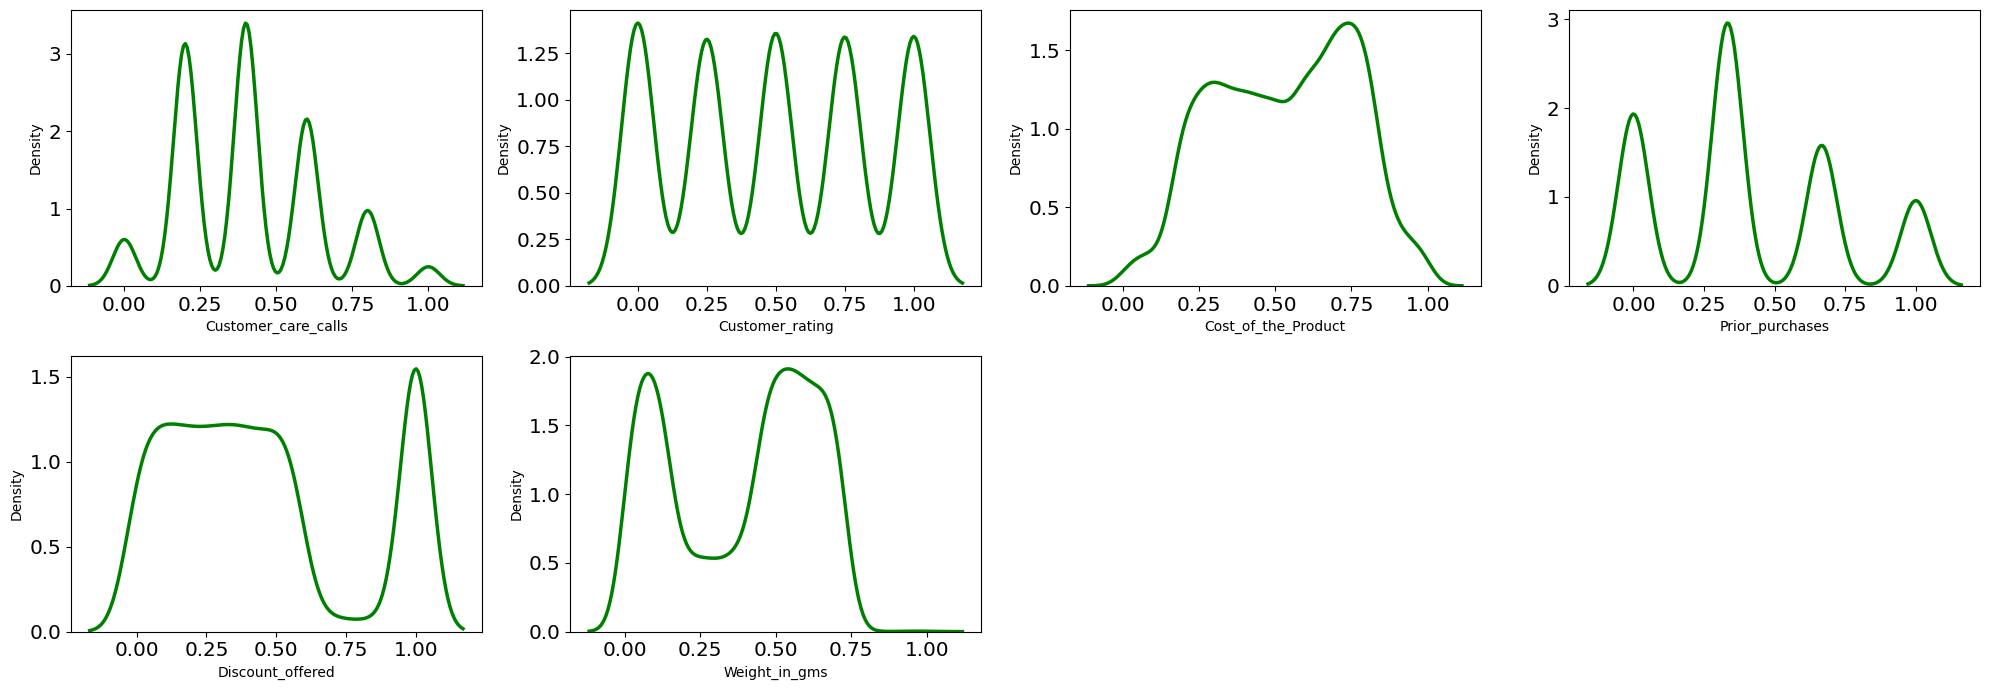

In [37]:
numerical = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
for i in range(0, len(numerical)):
  plt.subplot(2, 4, i+1) # len(features), i+1
  sns.kdeplot(x=X_train[numerical[i]], color = 'green')
  plt.xlabel(numerical[i])
  plt.tight_layout()

C:\Users\Windows10\AppData\Local\Temp\ipykernel_11200\2533924539.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train[numerical[i]], color = 'green')
C:\Users\Windows10\AppData\Local\Temp\ipykernel_11200\2533924539.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=X_train[numerical[

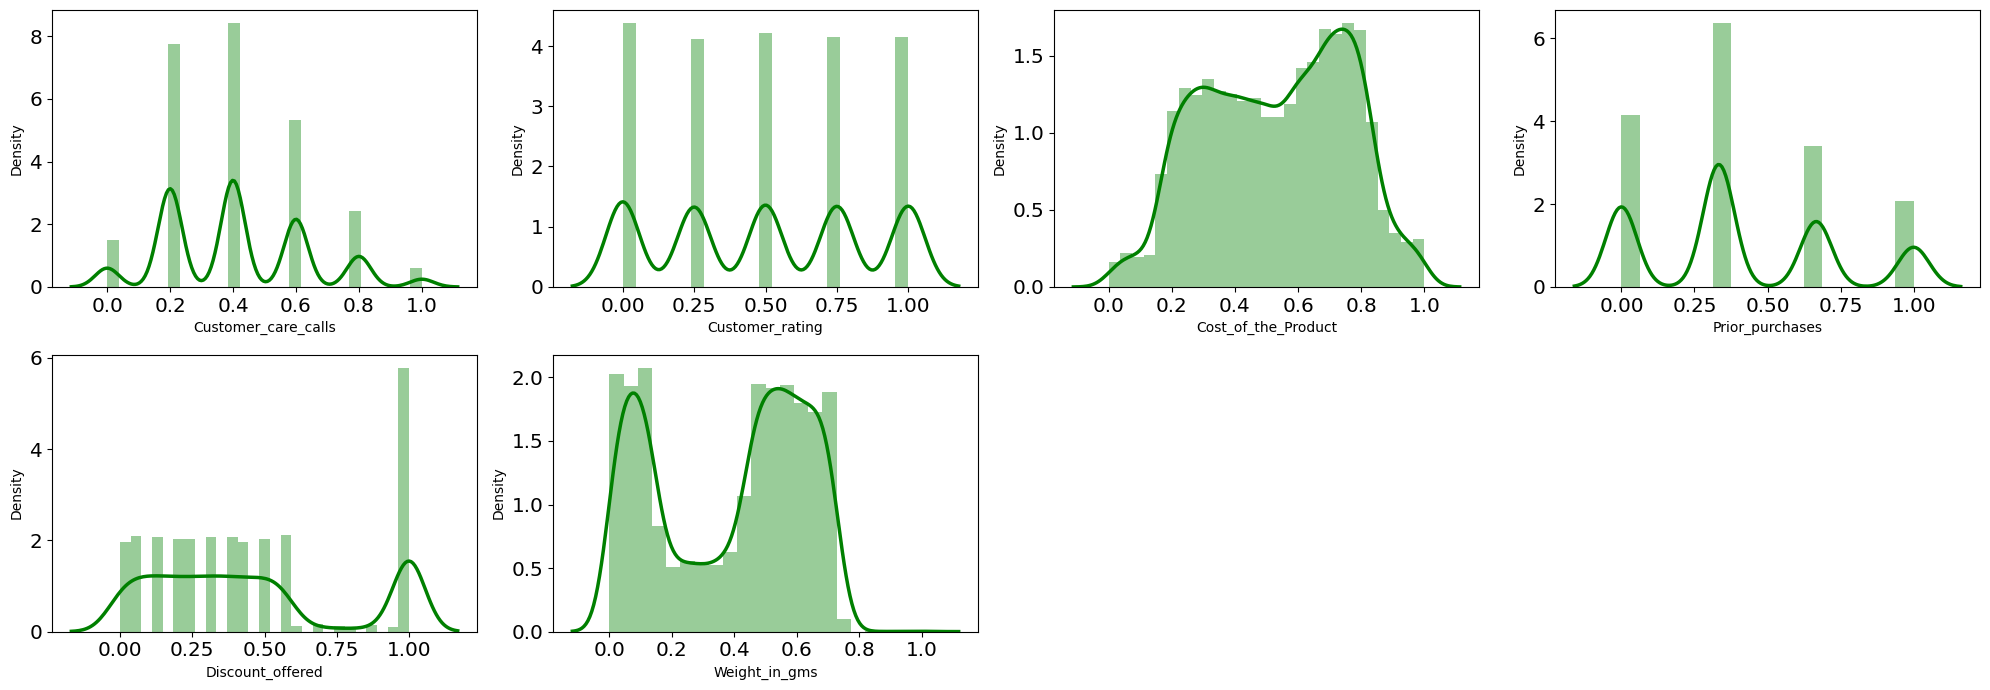

In [38]:
for i in range(0, len(numerical)):
  plt.subplot(2, 4, i+1) # len(features), i+1
  sns.distplot(x=X_train[numerical[i]], color = 'green')
  plt.xlabel(numerical[i])
  plt.tight_layout()

## Handle Class Imbalance

In [39]:
percentage = y_train.value_counts() / len(y_train) * 100
percentage

1    59.740422
0    40.259578
Name: Reached.on.Time_Y.N, dtype: float64

Berdasar hasil pengecekan kelas target diatas, perbandingan nilai yang ada berada dikisaran 40% - 60% sehingga dapat dianggap normal / **Tidak** imbalance

# Feature Engineering

## Feature Selection

Setelah dilihat dari persebaran datanya saat EDA melalui visualisasi, feature **Gender** dapat dihapus karena nilainya yang hampir balance pada semua aspek sehingga dapat dianggap tidak mempengaruhi apa pun

In [40]:
X_train = X_train.drop(['Gender_F', 'Gender_M'], axis=1)
X_test = X_test.drop(['Gender_F', 'Gender_M'], axis=1)

## Feature Extraction

Karena semua feature dianggap sudah sesuai dan tidak ada feature kategorikal yang memiliki nilai unik yang sangat banyak, maka Feature Extraction dirasa **tidak diperlukan**